In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/kaggle/input/life-expectancy-who/Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# EDA:

In [223]:
print("DATA QUALITY:")
print("-" * 50)
print(" DATA SHAPE:\n")
print(f"-  {df.shape[0]} Rows\n-  {df.shape[1]} Columns\n")
print("   Columns:", list(df.columns))
print(" COMPLETENESS CHECK:\n")

# Completeness Check (Missing Values)
missing_values = df.isna().sum()[df.isnull().sum() > 0]
missing_percent = (missing_values / len(df)) * 100

# Combine missing count and percentage into a DataFrame
missing_data = pd.DataFrame({
    "Missing Values": missing_values,
    "Percent Missing": missing_percent
})
missing_data = missing_data[missing_data["Missing Values"] > 0]
print(missing_data)
print("\n")
print(" DATA TYPES AND ROW COUNTS:\n")
print(df.info())

DATA QUALITY:
--------------------------------------------------
 DATA SHAPE:

-  2938 Rows
-  22 Columns

   Columns: ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
 COMPLETENESS CHECK:

                                 Missing Values  Percent Missing
Life expectancy                              10         0.340368
Adult Mortality                              10         0.340368
Alcohol                                     194         6.603131
Hepatitis B                                 553        18.822328
 BMI                                         34         1.157250
Polio                                        19         0.646698
Total expenditure                           226 

## Data Cleaning and Preprocessing:

In [224]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()

## Missing values:

In [225]:
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy="mean")

for col in cols_miss:
    df[col] = imputer_num.fit_transform(df[[col]])
    print(f"{col} done")

life expectancy done
adult mortality done
alcohol done
hepatitis b done
bmi done
polio done
total expenditure done
diphtheria done
gdp done
population done
thinness  1-19 years done
thinness 5-9 years done
income composition of resources done
schooling done


## Categoricals

In [226]:
df['country'].nunique()

193

In [227]:
df.groupby("status").count()["country"]

status
Developed      512
Developing    2426
Name: country, dtype: int64

In [229]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [230]:
le = LabelEncoder()
df["country"] = le.fit_transform(df["country"])

In [231]:

ohe = OneHotEncoder(drop="first",sparse_output=False)
df["status"] = ohe.fit_transform(df[["status"]])

# Training:

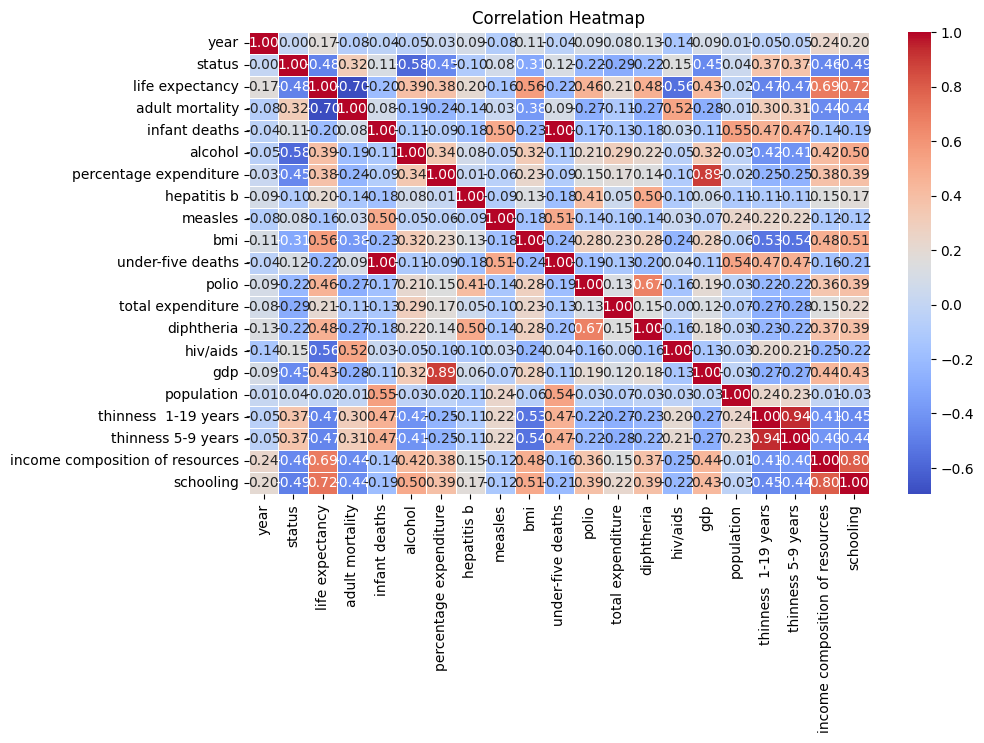

In [232]:
corr = df.drop(columns=["country"]).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', 
linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

## Simple regression:

In [238]:
X = df[["schooling"]]
y = df["life expectancy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Simple Linear Regression:")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

Simple Linear Regression:
MSE: 39.37
R²: 0.55


## Multiple regression

In [240]:
X = df.drop(columns=["life expectancy"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multiple_linear_reg = LinearRegression()
multiple_linear_reg.fit(X_train, y_train)

y_pred = multiple_linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMultiple Linear Regression:")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


Multiple Linear Regression:
MSE: 15.09
R²: 0.83


In [241]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

y_pred_poly = poly_reg.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression (Degree=2):")
print(f"MSE: {mse_poly:.2f}")
print(f"R²: {r2_poly:.2f}")


Polynomial Regression (Degree=2):
MSE: 10.38
R²: 0.88


In [242]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)  # Alpha controls the strength of regularization
ridge_reg.fit(X_train_poly, y_train)

y_pred_ridge = ridge_reg.predict(X_test_poly)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression:")
print(f"MSE: {mse_ridge:.2f}")
print(f"R²: {r2_ridge:.2f}")


Ridge Regression:
MSE: 8.49
R²: 0.90


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.44384e-37): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [243]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_poly, y_train)

y_pred_lasso = lasso_reg.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression:")
print(f"MSE: {mse_lasso:.2f}")
print(f"R²: {r2_lasso:.2f}")


Lasso Regression:
MSE: 8.09
R²: 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.001e+03, tolerance: 2.145e+01
  model = cd_fast.enet_coordinate_descent(
